In [72]:
import pandas as pd
import numpy as np
data = pd.read_csv('Basic_feature.csv', index_col=0)

In [73]:
X= data.drop(['Label','c5','c7','User_id','Merchant_id','Coupon_id'],axis=1)
Y=data['Label'].astype("string")

# Replacement invalid value with -1 and missing value with 0

In [74]:

d=['u3','u4','u5','u10','u11','u12','u13','um11','um12','c11','c12','m4','m5','m6','m7','m8','m9',]
    
for y in d:
    X[y]=X[y].fillna(-1)

X = X.replace({np.nan:0})
X

,c1,c2,c3,c4,c6,c8,c9,c10,c11,c12,...,um3,um4,um5,um6,um7,um8,um9,um10,um11,um12
0,1.0,7730,15.0,0.001940,5,1,0.0,0.000000,150.0,0.133333,...,0.0,0.00,0.25,0.0,0.0,1,2,1.0,0.500000,-1.000000
1,1.0,31,4.0,0.129032,2,3,1.0,0.333333,20.0,0.050000,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,-1.000000
2,1.0,12,0.0,0.000000,5,1,0.0,0.000000,20.0,0.050000,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,-1.000000
3,1.0,31,4.0,0.129032,0,3,1.0,0.333333,20.0,0.050000,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,-1.000000
4,1.0,31,4.0,0.129032,0,3,1.0,0.333333,20.0,0.050000,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053277,1.0,11,2.0,0.181818,2,2,2.0,1.000000,30.0,0.033333,...,2.0,1.00,0.00,2.0,0.0,2,3,2.0,0.666667,0.666667
1053278,1.0,10533,1611.0,0.152948,0,2,2.0,1.000000,30.0,0.166667,...,2.0,1.00,0.00,5.0,3.0,2,3,2.0,0.666667,0.333333
1053279,1.0,11,2.0,0.181818,6,2,2.0,1.000000,30.0,0.033333,...,2.0,1.00,0.00,2.0,0.0,2,3,2.0,0.666667,0.666667
1053280,1.0,929,12.0,0.012917,0,1,0.0,0.000000,50.0,0.200000,...,0.0,0.00,0.50,0.0,0.0,1,2,0.0,-1.000000,-1.000000


# Feature Selection - use Wrapper model to measure feature importance

In [75]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.feature_selection import SelectFromModel

In [76]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X,Y) #fit your data.
clf.feature_importances_

array([0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. ,
       0. , 0. , 0. , 0. , 0.1, 0. ])

In [77]:
b = sorted(enumerate(clf.feature_importances_), key=lambda x:x[1])  # x[1]是因为在enumerate(a)中，a数值在第1位
c = [x[0] for x in b]

In [78]:
colname=X.columns
d=c[-10:]
d.reverse()
d

[7, 36, 22, 4, 43, 23, 37, 6, 3, 35]

In [79]:
# top10 importance feature
for i in d:
    print(colname[i],":",clf.feature_importances_[i])

c10 : 0.33601947001302884
um4 : 0.1706551333163474
u4 : 0.07612165963699517
c6 : 0.0692767046260905
um11 : 0.057009162587773075
u5 : 0.03558525313601921
um5 : 0.030863198253823162
c9 : 0.025310991611762118
c4 : 0.01697867823051267
um3 : 0.014665702152542372


feature c10 and um4 weight high

# inbalance data

In [80]:
from sklearn.model_selection import train_test_split # this function provides a single "Hold-Out" Validation.
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score #similar to MAE, we use accuracy_score evaluation metric.
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [81]:
from collections import Counter
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 
Counter(Y_train)

Counter({'0': 586909, '-1': 6533, '1': 38527})

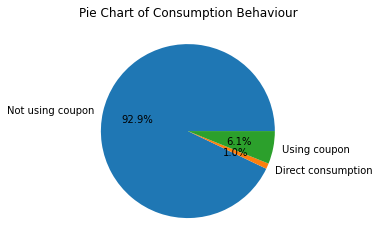

In [85]:
# classical decision tree model built in the origanl data after data prepareration

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
np.random.seed(1) #because the model has random sampling, a random seed can ensure repeated results.
#clf = RandomForestClassifier(max_depth=5,n_estimators=20)#500 bags, 500models
clf =DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

disp = plot_confusion_matrix(clf, X_test, Y_test,values_format = '.0f',cmap=plt.cm.Blues)

plt.title('Classical DecisionTree built by original training data')
plt.show()
#disp.title.set_text('Classical DecisionTree built by original training data')
#disp <- disp + labs(title = "Classical DecisionTree built by original training data") +theme(plot.title = element_text(hjust = 0.5))
disp
#np.set_printoptions(precision=1)

print(classification_report(Y_test, Y_predTest))

# 定义数据和标签{'0': 586909, '-1': 6533, '1': 38527}
data = [586909,6533,38527]
labels = [ 'Not using coupon','Direct consumption', 'Using coupon']

# 创建饼图
fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%')

# 添加标题
ax.set_title('Pie Chart of Consumption Behaviour')

# 显示图形
plt.savefig('Pie Chart of Consumption Behaviour.jpg',dpi=1000)

# acquire balance data with RandomOver,  RandomUnder, ADASYN and SMOT Sampler

In [86]:
from collections import Counter
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomOverSampler(shrinkage=1, random_state=0)
X_train_ROS, Y_train_ROS = sampler.fit_resample(X_train, Y_train)
Counter(Y_train_ROS)

Counter({'0': 586909, '-1': 586909, '1': 586909})

In [87]:
X_train_adasyn, Y_train_adasyn = ADASYN().fit_resample(X_train, Y_train)
Counter(Y_train_adasyn)

Counter({'0': 586909, '-1': 586185, '1': 582669})

In [16]:
X_train_SMOTE, Y_train_SMOTE = SMOTE().fit_resample(X_train, Y_train)
Counter(Y_train_SMOTE)

Counter({'0': 586909, '-1': 586909, '1': 586909})

In [17]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = {'0': 6533, '1': 6533, '-1':6533}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_train_RandomUnder, Y_train_RandomUnder = rus.fit_resample(X_train, Y_train)
Counter(Y_train_RandomUnder)

Counter({'-1': 6533, '0': 6533, '1': 6533})

# Train DecisionTree Model with RandomOverSampler

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
np.random.seed(1) #because the model has random sampling, a random seed can ensure repeated results.
#clf = RandomForestClassifier(max_depth=5,n_estimators=20)#500 bags, 500models
X_train_ROS, Y_train_ROS
clf =DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train_ROS, Y_train_ROS)
Y_predTrain = clf.predict(X_train_ROS)
Y_predTest = clf.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train_ROS, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.949632
Validation accuracy is 0.927277


C:\Users\95857\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


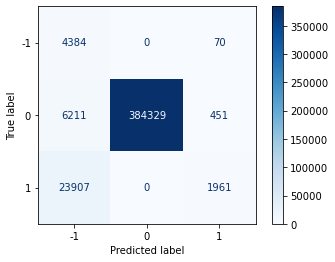

In [19]:
disp = plot_confusion_matrix(clf, X_test, Y_test,values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)

In [20]:
print(classification_report( Y_train_ROS, Y_predTrain))

              precision    recall  f1-score   support

          -1       0.89      0.97      0.93    586909
           0       1.00      0.98      0.99    586909
           1       0.97      0.89      0.93    586909

    accuracy                           0.95   1760727
   macro avg       0.95      0.95      0.95   1760727
weighted avg       0.95      0.95      0.95   1760727



In [21]:
print(classification_report( Y_test, Y_predTest))

              precision    recall  f1-score   support

          -1       0.13      0.98      0.23      4454
           0       1.00      0.98      0.99    390991
           1       0.79      0.08      0.14     25868

    accuracy                           0.93    421313
   macro avg       0.64      0.68      0.45    421313
weighted avg       0.98      0.93      0.93    421313



# Train DecisionTree Model with RandomUnderSampler

In [22]:
X_train_RandomUnder, Y_train_RandomUnder
clf =DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train_RandomUnder, Y_train_RandomUnder)
Y_predTrain = clf.predict(X_train_RandomUnder)
Y_predTest = clf.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train_RandomUnder, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.794071
Validation accuracy is 0.953987


C:\Users\95857\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


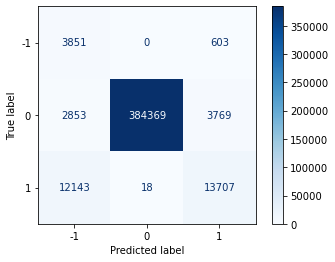

In [23]:
disp = plot_confusion_matrix(clf, X_test, Y_test,values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)

In [24]:
print(classification_report(Y_train_RandomUnder, Y_predTrain))

              precision    recall  f1-score   support

          -1       0.65      0.87      0.74      6533
           0       1.00      0.98      0.99      6533
           1       0.79      0.53      0.63      6533

    accuracy                           0.79     19599
   macro avg       0.81      0.79      0.79     19599
weighted avg       0.81      0.79      0.79     19599



In [25]:
print(classification_report( Y_test, Y_predTest))

              precision    recall  f1-score   support

          -1       0.20      0.86      0.33      4454
           0       1.00      0.98      0.99    390991
           1       0.76      0.53      0.62     25868

    accuracy                           0.95    421313
   macro avg       0.65      0.79      0.65    421313
weighted avg       0.98      0.95      0.96    421313



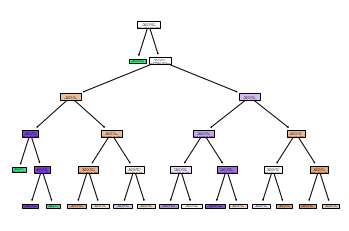

In [26]:
plot_tree(clf, filled=True)
plt.savefig('DecisionTreeClassifier under RandomUnder sampler.jpg',dpi=1000)

# Train DecisionTree Model with ADASYN Sampler

In [88]:
clf =DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train_adasyn, Y_train_adasyn)
Y_predTrain = clf.predict(X_train_adasyn)
Y_predTest = clf.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train_adasyn, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.757049
Validation accuracy is 0.965686


C:\Users\95857\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


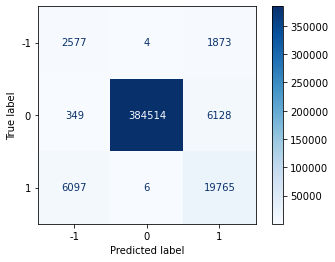

In [89]:
disp = plot_confusion_matrix(clf, X_test, Y_test,values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)

In [90]:
print(classification_report( Y_train_adasyn, Y_predTrain))

              precision    recall  f1-score   support

          -1       0.67      0.56      0.61    586185
           0       1.00      0.98      0.99    586909
           1       0.61      0.72      0.66    582669

    accuracy                           0.76   1755763
   macro avg       0.76      0.76      0.76   1755763
weighted avg       0.76      0.76      0.76   1755763



### Due to ignoring set random state while adopting ADASYN Sampler, this result is different from the report

In [91]:
print(classification_report( Y_test, Y_predTest))

              precision    recall  f1-score   support

          -1       0.29      0.58      0.38      4454
           0       1.00      0.98      0.99    390991
           1       0.71      0.76      0.74     25868

    accuracy                           0.97    421313
   macro avg       0.67      0.78      0.70    421313
weighted avg       0.97      0.97      0.97    421313



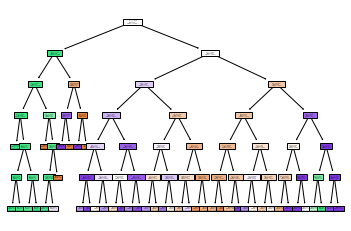

In [31]:
from sklearn.tree import plot_tree
plot_tree(clf, filled=True)
plt.savefig('DecisionTreeClassifier under ADASYN sampler.jpg',dpi=1000)

# Train DecisionTree Model with SMOT Sampler

In [32]:
X_train_SMOTE, Y_train_SMOTE
clf =DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train_SMOTE, Y_train_SMOTE)
Y_predTrain = clf.predict(X_train_SMOTE)
Y_predTest = clf.predict(X_test)

print('Training accuracy is %f' % accuracy_score( Y_train_SMOTE, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.800635
Validation accuracy is 0.953842


C:\Users\95857\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


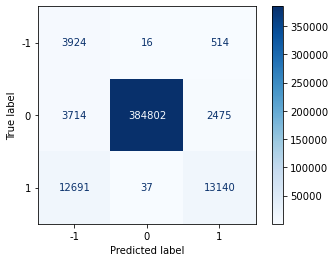

In [33]:
disp = plot_confusion_matrix(clf, X_test, Y_test,values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)

In [34]:
print(classification_report(Y_train_SMOTE, Y_predTrain))

              precision    recall  f1-score   support

          -1       0.64      0.91      0.76    586909
           0       1.00      0.98      0.99    586909
           1       0.84      0.51      0.63    586909

    accuracy                           0.80   1760727
   macro avg       0.83      0.80      0.79   1760727
weighted avg       0.83      0.80      0.79   1760727



In [35]:
print(classification_report( Y_test, Y_predTest))

              precision    recall  f1-score   support

          -1       0.19      0.88      0.32      4454
           0       1.00      0.98      0.99    390991
           1       0.81      0.51      0.63     25868

    accuracy                           0.95    421313
   macro avg       0.67      0.79      0.64    421313
weighted avg       0.98      0.95      0.96    421313



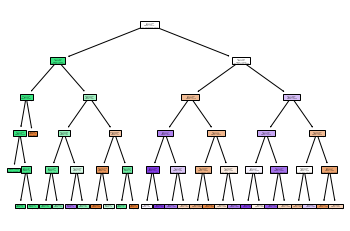

In [36]:
plot_tree(clf, filled=True)
plt.savefig('DecisionTreeClassifier under SMOTE sampler.jpg',dpi=1000)

# RandomForest Model with ADASYN Sampler

In [55]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1) #because the model has random sampling, a random seed can ensure repeated results.
clf = RandomForestClassifier(max_depth=5,n_estimators=100)
#clf =DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train_adasyn, Y_train_adasyn)
Y_predTrain = clf.predict(X_train_adasyn)
Y_predTest = clf.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train_adasyn, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.770003
Validation accuracy is 0.962925


C:\Users\95857\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


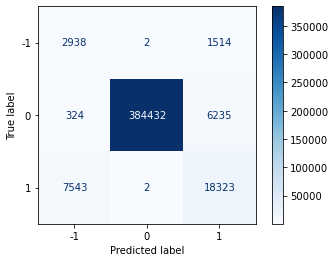

In [56]:
disp = plot_confusion_matrix(clf, X_test, Y_test,values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)
from sklearn.metrics import classification_report

In [57]:
print(classification_report(Y_train_adasyn, Y_predTrain))

              precision    recall  f1-score   support

          -1       0.66      0.67      0.67    586185
           0       1.00      0.98      0.99    586909
           1       0.65      0.65      0.65    582669

    accuracy                           0.77   1755763
   macro avg       0.77      0.77      0.77   1755763
weighted avg       0.77      0.77      0.77   1755763



In [58]:
print(classification_report( Y_test, Y_predTest))

              precision    recall  f1-score   support

          -1       0.27      0.66      0.39      4454
           0       1.00      0.98      0.99    390991
           1       0.70      0.71      0.71     25868

    accuracy                           0.96    421313
   macro avg       0.66      0.78      0.69    421313
weighted avg       0.97      0.96      0.97    421313

